In [25]:
import numpy as np

In [26]:
import numpy as np
import h5py
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.set_cmap('jet')

<Figure size 432x288 with 0 Axes>

In [27]:
# Define dimensions
num_reals = 1000
nx, ny, nz = 60, 60, 40

In [4]:
with h5py.File('mcnnpca_eval200_chan_wellsonly_60x60x40_cond4wfar_l400_ptb40_std1.h5', 'r') as fid:
    facies = np.array(fid['data'])
facies.shape

(200, 40, 60, 60, 1)

In [5]:
with h5py.File('mpca_logksand_eval1000_chan_bimodal_wellsonly_60x60x40_cond4wfar_l200.h5', 'r') as fid:
    logk_sand = np.array(fid['data'])
logk_sand = logk_sand[:200, ...]
logk_sand.shape

(200, 40, 60, 60, 1)

In [6]:
with h5py.File('mpca_logkmud_eval1000_chan_bimodal_wellsonly_60x60x40_cond4wfar_l200.h5', 'r') as fid:
    logk_mud = np.array(fid['data'])
logk_mud = logk_mud[:200, ...]
logk_mud.shape

(200, 40, 60, 60, 1)

In [7]:
logk = logk_sand * facies + logk_mud * (1-facies)

In [19]:
plt.rcParams['font.size'] =14

In [44]:
count, bins = np.histogram(logk.flatten(), 31)

In [39]:
count.shape

(10,)

In [63]:
np.median(np.exp(logk_sand.flatten()))

841.0

In [64]:
np.median(np.exp(logk_mud.flatten()))

35.03

In [65]:
np.median(logk_sand.flatten() / 40.)

0.1683

In [66]:
np.median(logk_mud.flatten() / 40.)

0.0889

In [59]:
np.exp(3.5)

33.11545195869231

In [60]:
np.exp(6.7)

812.4058251675433

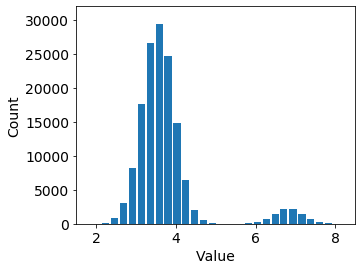

In [52]:
plt.figure(figsize=(5,4))
plt.bar((bins[:-1] + bins[1:]) / 2, count // 200, width=0.18)
plt.xlim([1.5, 8.5])
plt.ylim([0, 32000])
plt.xlabel('Value')
plt.ylabel('Count')
plt.savefig('figs/histo_cnnpca.png', bbox_inches='tight')
plt.show()

In [29]:
np.histogram(logk[1,...].flatten())

(array([ 3447, 53291, 69315,  7882,   279,    48,  3141,  5922,   658,
           17]),
 array([2.205, 2.838, 3.473, 4.105, 4.74 , 5.37 , 6.004, 6.64 , 7.273,
        7.906, 8.54 ], dtype=float16))

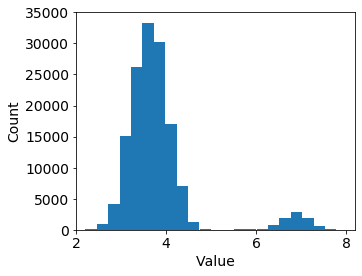

In [23]:
plt.figure(figsize=(5,4))
plt.hist(logk[2,...].flatten(), 25)
plt.xlim([2.0, 8.2])
plt.ylim([0, 35000])
plt.xlabel('Value')
plt.ylabel('Count')
plt.savefig('figs/histo_cnnpca.png', bbox_inches='tight')
plt.show()

In [9]:
del facies
del logk_sand
del logk_mud

In [10]:
plt.set_cmap('jet')

<Figure size 432x288 with 0 Axes>

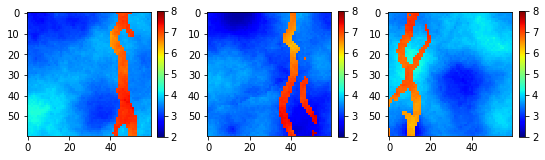

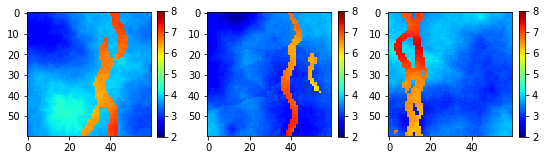

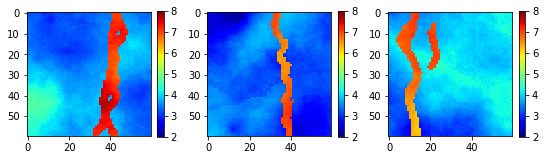

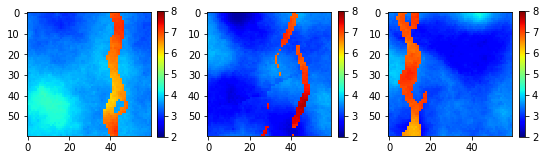

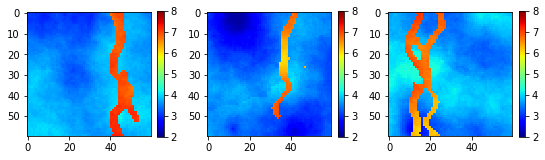

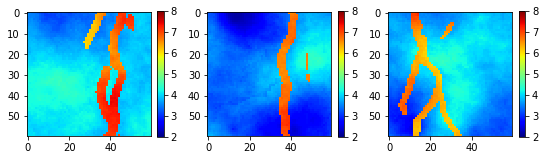

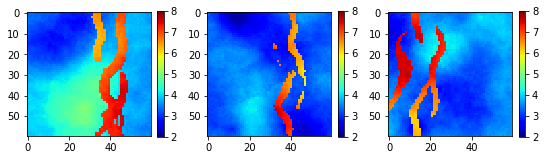

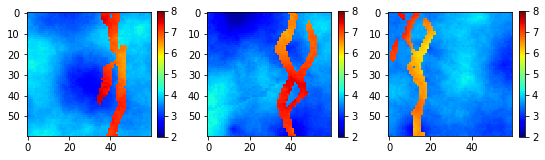

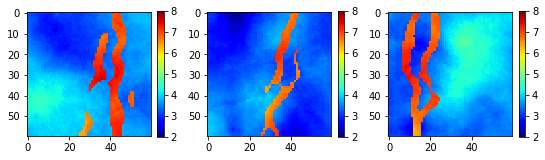

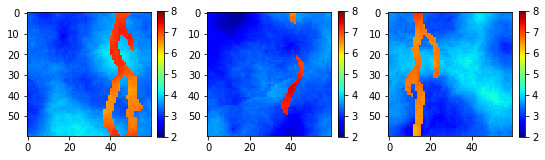

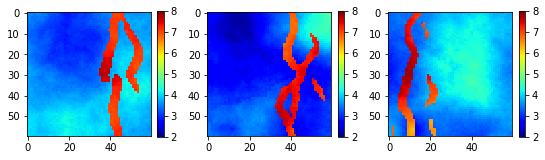

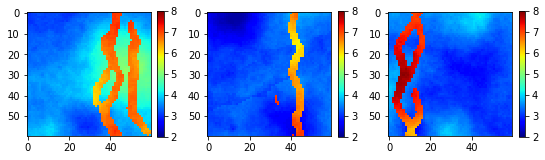

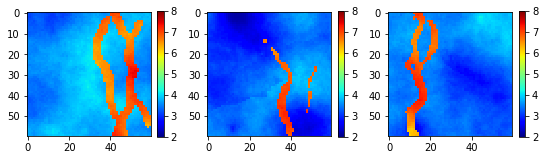

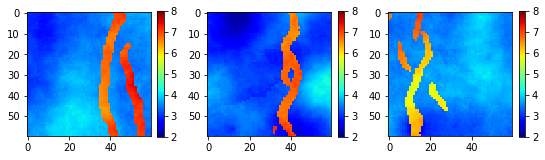

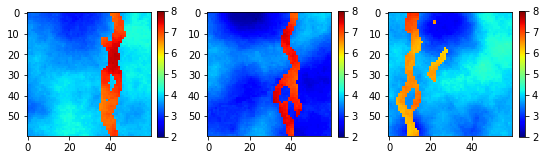

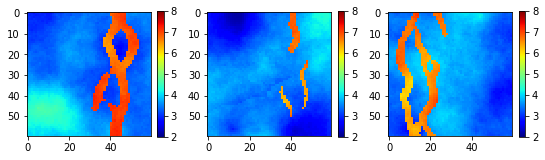

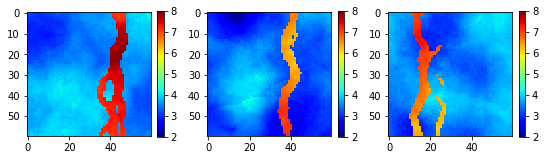

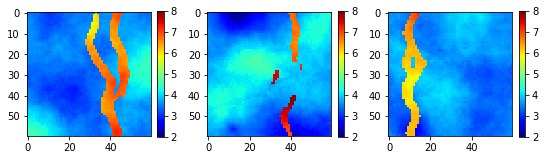

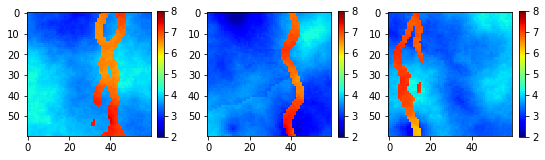

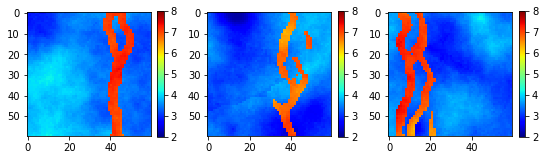

In [11]:
for ind in range(20):
    plt.figure(figsize=(10,4))
    nz = 4
    for iz, z in enumerate([0, 10, 20]):
        plt.subplot(1,nz, iz+1)
        plt.imshow(logk[ind, z, :, :, 0].astype('double'))
        plt.clim([2,8])
        plt.colorbar(fraction=0.046)
    plt.tight_layout()
    plt.show()

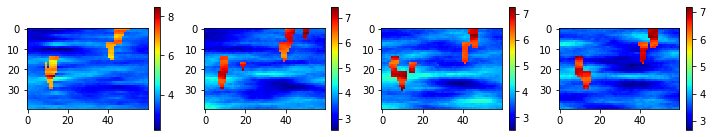

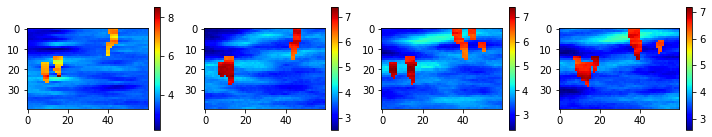

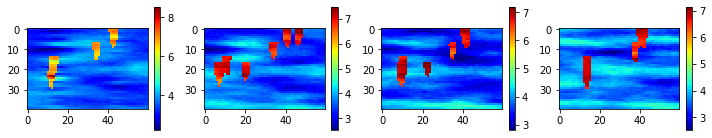

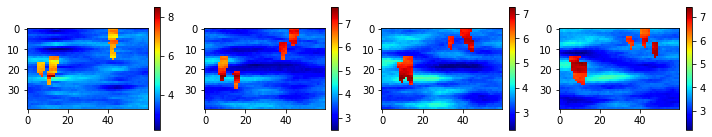

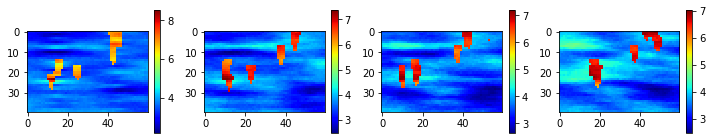

In [12]:
for ind in range(5):
    plt.figure(figsize=(10,4))
    nz = 4
    for iz, z in enumerate([0, 10, 20, 30]):
        plt.subplot(1,nz, iz+1)
        plt.imshow(logk[ind, :, z, :, 0].astype('double'))
        plt.colorbar(fraction=0.046)
    plt.tight_layout()
    plt.show()

In [13]:
with h5py.File('mcnnpca_bimodal_twostep_eval1200_chan_wellsonly_60x60x40_cond4wfar_l500chan_l200gauss.h5', 'w') as fid:
    fid.create_dataset('data', data=logk)